In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import *
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.backend import expand_dims
from PIL import Image
import pickle as pk

from tools import *
from model import *
from os.path import getsize
from sys import getsizeof
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

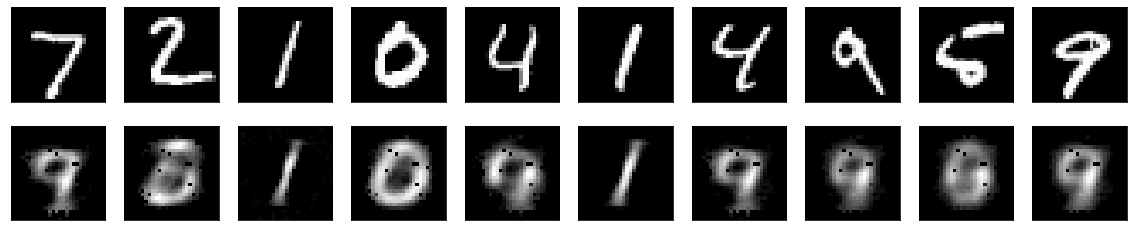

In [11]:
predict_plot(autoencoder, x_test)

In [26]:
import pickle as pk
for i in range(0, 20):
    encoder, decoder, autoencoder = create_model('Dense', encoding_dim=i+1)
    print('model' + str(i+1))
    autoencoder.fit(x_train, x_train,
                    epochs=49,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    autoencoder.fit(x_train, x_train,
                    epochs=1,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2)
    pk.dump([encoder, decoder, autoencoder], open('model_dense' + str(i+1) + '.pkl', 'wb'))

model1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0644 - val_loss: 0.0646
model2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0576 - val_loss: 0.0576
model3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0527 - val_loss: 0.0523
model4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0480 - val_loss: 0.0477
model5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0434 - val_loss: 0.0430
model6
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0401 - val_loss: 0.0396
model7
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0373 - val_loss: 0.0369
model8
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0348 - val_loss: 0.0344
model9
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0331 - val_loss: 0.0327
model10
Train on 60000 samples, valid

In [27]:
import pickle as pk
for i in range(20, 196, 6):
    encoder, decoder, autoencoder = create_model('Dense', encoding_dim=i+1)
    print('model' + str(i+1))
    autoencoder.fit(x_train, x_train,
                    epochs=49,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    autoencoder.fit(x_train, x_train,
                    epochs=1,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2)
    pk.dump([encoder, decoder, autoencoder], open('model_dense' + str(i+1) + '.pkl', 'wb'))

model21
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0169 - val_loss: 0.0164
model27
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0126 - val_loss: 0.0122
model33
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0100 - val_loss: 0.0097
model39
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0081 - val_loss: 0.0078
model45
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0067 - val_loss: 0.0065
model51
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0057 - val_loss: 0.0055
model57
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0050 - val_loss: 0.0048
model63
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0045 - val_loss: 0.0044
model69
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 1s - loss: 0.0040 - val_loss: 0.0039
model75
Train on 60000 sampl

In [24]:
import pickle as pk
for i in range(22, 196, 6):
    encoder, decoder, autoencoder = create_model('CNN', encoding_dim=i+1)
    print('model' + str(i+1))
    autoencoder.fit(x_train, x_train,
                    epochs=29,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    autoencoder.fit(x_train, x_train,
                    epochs=1,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2)
    pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

model23
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0124 - val_loss: 0.0127
model29
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0128 - val_loss: 0.0133
model35
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0142 - val_loss: 0.0138
model41
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0115 - val_loss: 0.0114
model47
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0125 - val_loss: 0.0129
model53
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0123 - val_loss: 0.0121
model59
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0112 - val_loss: 0.0110
model65
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0115 - val_loss: 0.0111
model71
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 9s - loss: 0.0117 - val_loss: 0.0116
model77
Train on 60000 sampl

In [6]:
import pickle as pk
pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

W1217 22:08:32.686443 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 22:08:32.749519 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1217 22:08:32.901425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1217 22:08:32.902425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1217 22:08:32.903431 10764 deprecation_wrapper.py:119] From C:

In [68]:
np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2))

1418.3439305923812

In [65]:
np.sum((y_test-x_test)**2).shape

()

In [ ]:
y_test

In [59]:
np.linalg.norm(np.array(y_test)[1]-x_test[1], ord=2)

1589.2249419862314

In [ ]:
file_size = []
mse_loss = []
for i in range(1, 96):
    y_test = []
    y_size = []
    for img in x_test:
        result = Image.fromarray(img)
        name = 'imgs/temp.jpg'
        result.save(name, 'JPEG', quality=i)
        y_size.append(getsize(name)/912)
        I = np.asarray(Image.open(name))
        y_test.append(I)
    mse_loss.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))
    file_size.append(np.mean(y_size))

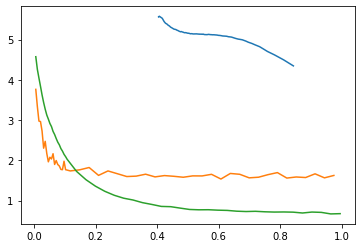

In [11]:
plt.plot(file_size, np.array(mse_loss)/255.)
plt.plot(file_size_auto, mse_loss_auto)
plt.plot(file_size_dense, mse_loss_dense)
# plt.plot(getsize('out_encode.npy')/912, np.linalg.norm(a[0]-x_train[0], ord=2), 'or')

In [72]:
pk.dump([file_size, mse_loss], open('log_jpg', 'wb'))

In [10]:
[file_size, mse_loss] = pk.load(open('log_jpg', 'rb'))

In [116]:
file_size_auto = np.array(file_size_auto)/912

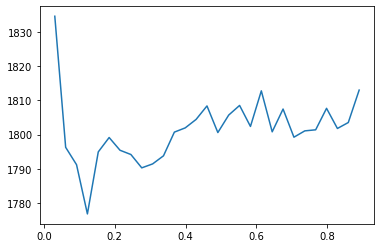

In [117]:
plt.plot(file_size_auto, mse_loss_auto)

In [ ]:
mse_loss_auto = np.array(mse_loss_auto)

In [3]:
# import pickle as pk
file_size_auto = []
mse_loss_auto = []
for i in range(196):
    try:
        [encoder, decoder, autoencoder] = pk.load(open('model' + str(i+1) + '.pkl', 'rb'))
    except:
        continue
    y_test = autoencoder.predict(x_test)
    file_size_auto.append(4 * (i+1) / 784)
    mse_loss_auto.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))

W0119 17:33:56.888669  4652 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0119 17:33:56.922646  4652 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0119 17:33:57.089548  4652 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0119 17:33:57.090543  4652 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0119 17:33:57.091542  4652 deprecation_wrapper.py:119] From C:

C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tan

In [6]:
pk.dump([file_size_auto, mse_loss_auto], open('log_auto', 'wb'))

In [3]:
import pickle as pk
[file_size_auto, mse_loss_auto] = pk.load(open('log_auto', 'rb'))

In [7]:
file_size_dense = []
mse_loss_dense = []
for i in range(196):
    try:
        [encoder, decoder, autoencoder] = pk.load(open('model_dense' + str(i+1) + '.pkl', 'rb'))
    except:
        continue
    y_test = autoencoder.predict(x_test)
    file_size_dense.append(4 * (i+1) / 784)
    mse_loss_dense.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))

C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tan

C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tan

In [ ]:
pk.dump([file_size_dense, mse_loss_dense], open('log_dense', 'wb'))